## Plotting ISCO sample inventory over winter 2023 discharge

### Discharge data from Satish in sonya-may2024 directory

## TO DO:

- [ ] error bars on EM NO3 barplot
- [ ] use this nb to calc EM variance

Rows: 136 Columns: 31
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (10): Sample ID, Site, Date, Type, Type2, Index-notes, ICP-notes, IC-no...
dbl  (20): Fe_mg_L, Mn_mg_L, Cu_mg_L, Zn_mg_L, Si_mg_L, K_mg_L, P_mg_L, Mg_m...
time  (1): Time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


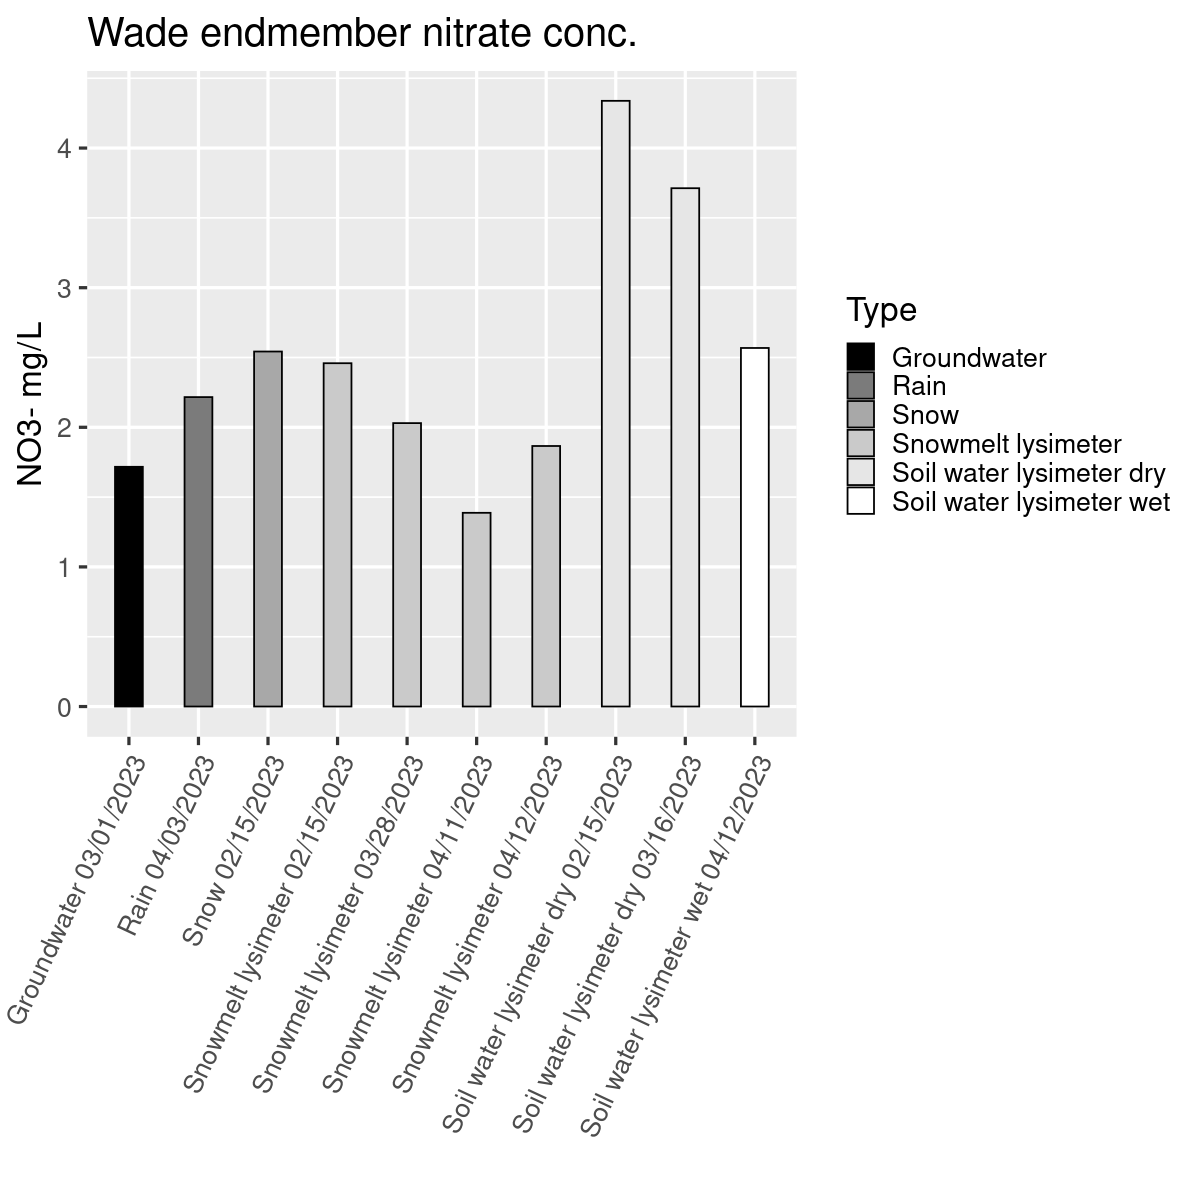

In [12]:
#################
# LOAD PACKAGES #
#################

library(tidyverse)
library(viridis)
library(dplyr)
library(lubridate)
library(caTools)  # for numerical integration
library(data.table) # for nearest join of q and ISCO data
library(patchwork)
library(ggplot2)

###################
# SET DIRECTORIES #
###################

q_input_dir <- "~//OneDrive/git-repos/cQ_analysis/millar2021_R_separation_hysteresis/sonya-may24/data"
c_input_dir <- "~//OneDrive/git-repos/EMMA/isco_metadata/LCBP_RI_sample_index/"
m_input_dir <- "~//OneDrive/git-repos/cQ_analysis/baseflow-rules-determinaton/data/"
output_dir <- "~//OneDrive/git-repos/EMMA/output/"

##########################
# READ IN AND CLEAN DATA #
##########################

# read in the RI23 data
# see joining here: 
# https://github.com/MeganEDuffy/EMMA/blob/main/isco_metadata/LCBP_RI_sample_index/RI23-sample-ID-join.ipynb
# I have a manual version that prunes out replicate endmember measurements - should use for error bars eventually
MetadataISCO <- read_csv(file.path(c_input_dir, "RI23-IC-ICP-isotope-joined_dups_pruned.csv")) %>%
    filter(Type2 == 'Endmember') %>%
    filter(Site == "Wade") %>%
    drop_na("NO3_mg_L") %>%
    mutate(Fullname = paste(Type, Date, sep = " "))

# Convert the "Date" column to date format and Time to time format
MetadataISCO$Date <- mdy(MetadataISCO$Date)  # mdy() parses dates in "month/day/year" format 

# Combine Date, Time, and Time zone columns into a single Datetime column
MetadataISCO <- MetadataISCO %>%
  mutate(Datetime = ymd_hms(paste(Date, format(Time, "%H:%M:%S"), "Time Zone")))

###################
# PLOT NO3 values #
###################

options(repr.plot.width = 10, repr.plot.height = 10) 

ggplot(MetadataISCO, aes(x=Fullname, y=NO3_mg_L, fill = Type)) +
   geom_bar(stat = "identity", width=0.4, color = 'black')+
   xlab("") +
   ylab("NO3- mg/L") +
   ggtitle("Wade endmember nitrate conc.") +
   theme_grey(base_size = 20) +
   theme(axis.text.x = element_text(angle = 65, hjust = 1)) +
   scale_fill_grey(start = 0, end = 1)  # Adjust the start and end values for your desired shade range

Rows: 136 Columns: 31
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (10): Sample ID, Site, Date, Type, Type2, Index-notes, ICP-notes, IC-no...
dbl  (20): Fe_mg_L, Mn_mg_L, Cu_mg_L, Zn_mg_L, Si_mg_L, K_mg_L, P_mg_L, Mg_m...
time  (1): Time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


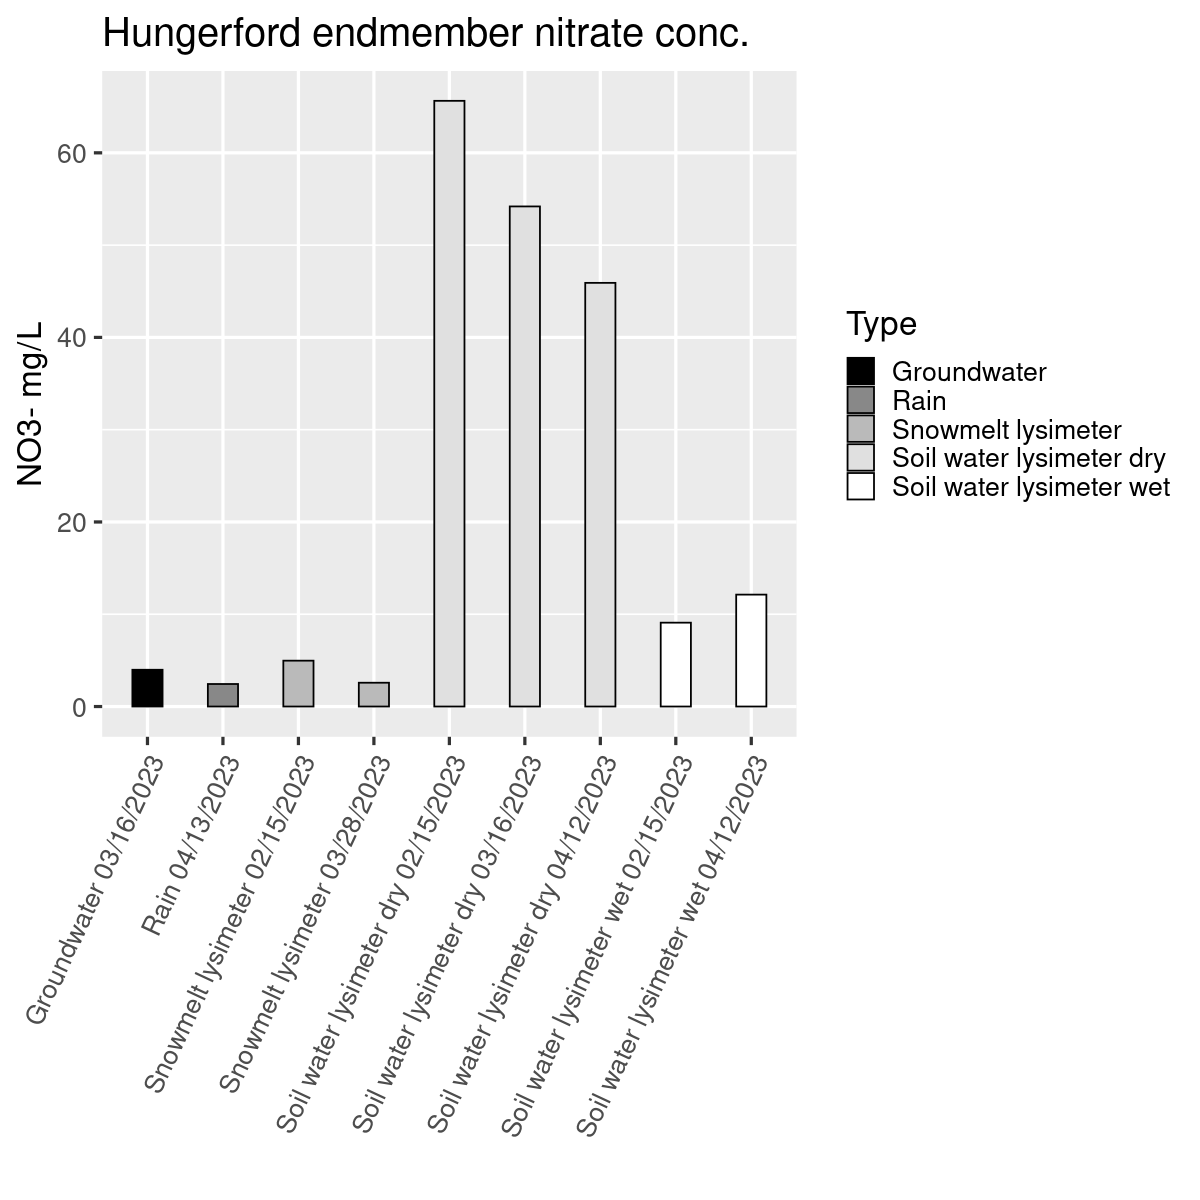

In [8]:
#################
# LOAD PACKAGES #
#################

library(tidyverse)
library(viridis)
library(dplyr)
library(lubridate)
library(caTools)  # for numerical integration
library(data.table) # for nearest join of q and ISCO data
library(patchwork)
library(ggplot2)

###################
# SET DIRECTORIES #
###################

q_input_dir <- "~//OneDrive/git-repos/cQ_analysis/millar2021_R_separation_hysteresis/sonya-may24/data"
c_input_dir <- "~//OneDrive/git-repos/EMMA/isco_metadata/LCBP_RI_sample_index/"
m_input_dir <- "~//OneDrive/git-repos/cQ_analysis/baseflow-rules-determinaton/data/"
output_dir <- "~//OneDrive/git-repos/EMMA/output/"

##########################
# READ IN AND CLEAN DATA #
##########################

# read in the RI23 data
# see joining here: 
# https://github.com/MeganEDuffy/EMMA/blob/main/isco_metadata/LCBP_RI_sample_index/RI23-sample-ID-join.ipynb
MetadataISCO <- read_csv(file.path(c_input_dir, "RI23-IC-ICP-isotope-joined_dups_pruned.csv")) %>%
    filter(Type2 == 'Endmember') %>%
    filter(Site == "Hungerford") %>%
    drop_na("NO3_mg_L") %>%
    mutate(Fullname = paste(Type, Date, sep = " "))

# Convert the "Date" column to date format and Time to time format
MetadataISCO$Date <- mdy(MetadataISCO$Date)  # mdy() parses dates in "month/day/year" format 

# Combine Date, Time, and Time zone columns into a single Datetime column
MetadataISCO <- MetadataISCO %>%
  mutate(Datetime = ymd_hms(paste(Date, format(Time, "%H:%M:%S"), "Time Zone")))

###################
# PLOT NO3 values #
###################

ggplot(MetadataISCO, aes(x = Fullname, y = NO3_mg_L, fill = Type)) +
  geom_bar(stat = "identity", width = 0.4, color = 'black') +
  xlab("") +
  ylab("NO3- mg/L") +
  ggtitle("Hungerford endmember nitrate conc.") +
  theme_grey(base_size = 20) +
  theme(axis.text.x = element_text(angle = 65, hjust = 1)) +
  scale_fill_grey(start = 0, end = 1)  # Adjust the start and end values for your desired shade range

In [9]:
# Convert the "Date" column to date format and Time to time format
MetadataISCO$Date <- mdy(MetadataISCO$Date)  # mdy() parses dates in "month/day/year" format 

# Combine Date, Time, and Time zone columns into a single Datetime column
MetadataISCO <- MetadataISCO %>%
  mutate(Datetime = ymd_hms(paste(Date, format(Time, "%H:%M:%S"), "Time Zone")))

# Read in the q data
Hungerford_q <- read_csv(file.path(q_input_dir, "hb_q_chem.csv")) %>%
  mutate(q_cms = q_cms_hb)
Wade_q <- read_csv(file.path(q_input_dir, "wb_q_chem.csv")) %>%
  mutate(q_cms = q_cms_wb)

# Read in the met data for air temp
Hungerford_m <- read_csv(file.path(m_input_dir, "hungerford_2020-2024_met_2024-11-08.csv")) %>%
  filter(Timestamp > as.Date("2023-01-01 00:00:00"), 
        Timestamp < as.Date("2023-04-20 00:00:00")) %>%
  mutate(Stream = "Hungerford")
  
Wade_m <- read_csv(file.path(m_input_dir, "wade_2020-2024_met_2024-11-08.csv")) %>%
  filter(Timestamp > as.Date("2023-01-01 00:00:00"), 
        Timestamp < as.Date("2023-04-20 00:00:00")) %>%
  mutate(Stream = "Wade")

# Remove rows with NA for Air_Temp for Wade and Precip
Wade_m_clean <- Wade_m %>% filter(!is.na(Air_Temp))
Wade_m_clean <- Wade_m %>% filter(!is.na(Precip_Increm))

#######################
# PLOT ENDMEMBER RANGES
#######################

Warning message:
“All formats failed to parse. No formats found.”
Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `Datetime = ymd_hms(paste(Date, format(Time, "%H:%M:%S"), "Time Zone"))`.
Caused by warning:
! All formats failed to parse. No formats found.”
Rows: 77548 Columns: 17
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr   (6): type, NO3_source, TP_source, TDP_source, PP_source, SRP_source
dbl  (10): q_cms_hb, q_cms_mb, q_cms_pred, q_cms_hb_filled, NO3, year, TP, T...
dttm  (1): datetime

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 74254 Columns: 11
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): type, NO3_source, TP_source
dbl  (7): q_cms_wb, q_cms_

In [ ]:
MetadataISCO